In [264]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
import math
import matplotlib.pyplot as plt
import pickle
from matplotlib import style

In [265]:
DATA = pd.read_excel(r"C:\Users\rishi\Desktop\Programming\Python\Projects\StudentPerformanceML\student\student-mat.xlsx")
DATA.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [266]:
data = DATA[["G1", "G2", "G3", "studytime", "failures", "absences"]]
data.head()

,G1,G2,G3,studytime,failures,absences
0,5,6,6,2,0,6
1,5,5,6,2,0,4
2,7,8,10,2,3,10
3,15,14,15,3,0,2
4,6,10,10,2,0,4


In [267]:
predict = "G3"

x = np.array(data.drop(columns=predict))
y = np.array(data[predict])

In [268]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1)

In [269]:
lr_model = linear_model.LinearRegression()
lr_model.fit(x_train, y_train)

LinearRegression()

In [270]:
acc = lr_model.score(x_test, y_test)
print(f"The accuracy of our model is: {acc}")

The accuracy of our model is: 0.9531995230536127


In [271]:
print(f"The value for w is: {lr_model.coef_}\nAnd the value of b is: {lr_model.intercept_}")

The value for w is: [ 0.15573537  0.97677771 -0.20041202 -0.29937862  0.03586375]
And the value of b is: -1.4684883549468069


In [272]:
predictions = lr_model.predict(x_test)
for x in range(5):
    print(f"The predicted value was {predictions[x]}\nThe actual value was {y_test[x]}", end="\n\n")

The predicted value was 15.00732510920546
The actual value was 15

The predicted value was 14.25801026254703
The actual value was 13

The predicted value was -0.3119586764924187
The actual value was 0

The predicted value was 11.891350401020537
The actual value was 12

The predicted value was 13.50985172215166
The actual value was 15



In [273]:
with open("studentmodel.pickle", "wb") as f:
    pickle.dump(lr_model, f)

In [275]:
pickle_in = open("studentmodel.pickle", "rb")
lr_model = pickle.load(pickle_in)

## How to use this?

In [ ]:
best = 0
for _ in range(30):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1)

    linear = linear_model.LinearRegression()

    linear.fit(x_train, y_train)
    acc = linear.score(x_test, y_test)
    print(acc)

    if acc > best:
        with open("studentmodel.pickle", "wb") as f:
            pickle.dump(linear, f)

pickle_in = open("studentmodel.pickle", "rb")
linear = pickle.load(pickle_in)

print(f"The value for w is: {lr_model.coef_}\nAnd the value of b is: {lr_model.intercept_}")

In [277]:
style.use("ggplot")

Text(0, 0.5, 'Final Grade')

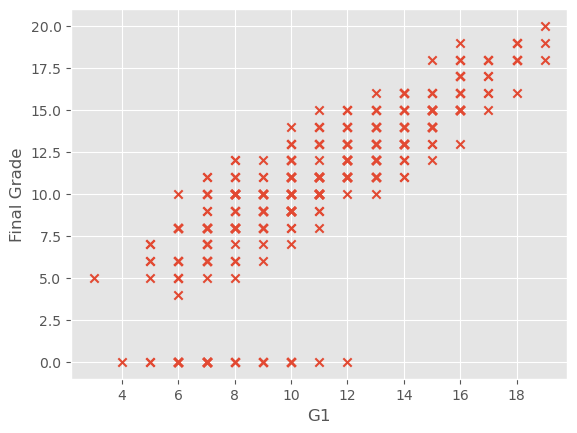

In [287]:
p = 'G1'
plt.scatter(data[p], data["G3"], marker='x')
plt.xlabel(p)
plt.ylabel("Final Grade")